# Тестовое задание на вакансию
## "Младший аналитик"

* На новых пользователях в некоторых странах был проведен A/B-тест. Его суть
заключалась в том, что для тестовой группы удвоили стоимость премиум-подписки при
покупке через платежные системы Google Play и Payment Ninja. Стоимость пробной
подписки не менялась.

* Премиум подписка дает доступ к некоторым важным заблокированным функциям.
Если приобретает премиум-подписку, то ежемесячно с него списывается
фиксированная сумма денег, если он ее не отменит.

* Вам необходимо выяснить, удачен ли эксперимент. Если все же тест не подтвердил
преимущества новых цен, то проанализировать, имеет ли данная правка смысл хоть
на каких-то группах пользователей.

Свои выводы подкрепите содержательными таблицами и графиками.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import dabl
import datetime
%matplotlib inline

In [55]:
from IPython.display import display_html
from itertools import chain, cycle

In [56]:
def display_side_by_side(*args, titles=cycle([''])):
    html_str = ''
    for df, title in zip(args, chain(titles, cycle(['/br'])) ):
        html_str += '<th style ="text-align:center"<td style="vertical-align:top">>'
        html_str += f'<h2>{title}</h2>'
        html_str += df.to_html().replace('table', 'table style="display:inline"')
        html_str += '</td></th>'
    display_html(html_str, raw=True)

In [2]:
TG_payments = pd.read_csv('payments_TG.csv', sep=';', index_col='user_id')

In [3]:
payments_CG1 = pd.read_csv('payments_CG1.csv', sep=';', index_col='user_id')

In [4]:
payments_CG2 = pd.read_csv('payments_CG2.csv', sep=';', index_col='user_id')

In [5]:
portrait_TG = pd.read_csv('portrait_TG.csv', sep=';', index_col='user_id')
portrait_CG1 = pd.read_csv('portrait_CG1.csv', sep=';', index_col='user_id')
portrait_CG2 = pd.read_csv('portrait_CG2.csv', sep=';', index_col='user_id')

In [6]:
portrait_TG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4308 entries, 892309896 to 891668910
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      4308 non-null   int64  
 1   attraction_distribution  4308 non-null   int64  
 2   coins                    49 non-null     float64
 3   country                  4308 non-null   object 
 4   retention_days           2978 non-null   object 
 5   sex                      4308 non-null   int64  
 6   user_dating.age_start    4308 non-null   int64  
 7   user_dating.age_end      4308 non-null   int64  
 8   view_count               4308 non-null   int64  
 9   was_special              408 non-null    float64
 10  is_special               157 non-null    float64
 11  total_revenue            4308 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 437.5+ KB


In [7]:
TG_payments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 891345942 to 891499359
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   registration_date   273 non-null    object
 1   payment_date        273 non-null    object
 2   revenue             273 non-null    int64 
 3   payment_service_id  273 non-null    int64 
 4   place               273 non-null    object
 5   country             273 non-null    object
 6   product_type        273 non-null    object
dtypes: int64(2), object(5)
memory usage: 17.1+ KB


In [8]:
portrait_TG['coins'] = portrait_TG['coins'].fillna(0)
portrait_CG1['coins'] = portrait_CG1['coins'].fillna(0)
portrait_CG2['coins'] = portrait_CG2['coins'].fillna(0)

In [9]:
portrait_TG['was_special'] = portrait_TG['was_special'].fillna(0)
portrait_CG1['was_special'] = portrait_CG1['was_special'].fillna(0)
portrait_CG2['was_special'] = portrait_CG2['was_special'].fillna(0)

In [10]:
portrait_TG['is_special'] = portrait_TG['is_special'].fillna(0)
portrait_CG1['is_special'] = portrait_CG1['is_special'].fillna(0)
portrait_CG2['is_special'] = portrait_CG2['is_special'].fillna(0)

In [11]:
portrait_TG['retention_days'] = portrait_TG['retention_days'].fillna(0)
portrait_CG1['retention_days'] = portrait_CG1['retention_days'].fillna(0)
portrait_CG2['retention_days'] = portrait_CG2['retention_days'].fillna(0)

In [12]:
payments_CG1 = payments_CG1.dropna()

In [72]:
TG_payments.head()

,registration_date,payment_date,revenue,payment_service_id,place,country,product_type,registration_day,payment_day
user_id,,,,,,,,,
891345942,2017-11-05 13:00:00,2017-11-13 15:04:00,12909,147,TrialVipPopup,IT,trial,5,13
892054251,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,TrialVipPopup,US,trial,22,30
892236423,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,Menu,US,other,18,23
892236423,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,Menu,US,other,18,27
892168170,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,TrialVipPopup,US,trial,19,27


In [73]:
TG_payments.place.unique()

array(['TrialVipPopup', 'Menu', 'AutoReplyMessage', 'LeftMenu',
       'autorefill', 'AdToPhotoBlog', 'Gifts', 'none', 'promo.key31',
       'super_popup_profile_menu', 'EmptyLikes', 'EmptyMutual',
       'PopularUserChatBlock', 'SendMessage', 'coins_popup_navigation',
       'PopularUserBlockDialog', 'sympathy_access', 'VipDelivery', 'Fans',
       'Dating', 'UserProfileFragment', 'Likes'], dtype=object)

In [14]:
portrait_TG.head()

,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
user_id,,,,,,,,,,,,
892309896,27,685,0.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0
892044516,27,0,0.0,DE,0,1,24,30,0,0.0,0.0,0
892185708,45,44,0.0,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0
892130292,32,0,0.0,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0
891406035,27,1000,0.0,FR,0,1,24,30,1,1.0,0.0,0


In [141]:
portrait_TG.describe()

,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000,4308.000000
mean,31.889276,316.411328,2.614206,0.953110,26.701486,38.248839,50.391133,0.094708,0.036444,534.080316
std,10.245287,323.373725,129.608910,0.211427,9.390851,15.344562,318.676437,0.292845,0.187414,4371.682632
min,16.000000,0.000000,0.000000,0.000000,13.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,1.000000,19.000000,28.000000,1.000000,0.000000,0.000000,0.000000
50%,30.000000,250.000000,0.000000,1.000000,24.000000,35.000000,6.000000,0.000000,0.000000,0.000000
75%,38.000000,520.250000,0.000000,1.000000,32.000000,44.000000,22.000000,0.000000,0.000000,0.000000
max,99.000000,1000.000000,8466.000000,1.000000,96.000000,102.000000,12831.000000,1.000000,1.000000,129870.000000


In [15]:
TG_payments['registration_date']  = pd.to_datetime(TG_payments['registration_date'], dayfirst=True)
TG_payments['registration_day'] = TG_payments['registration_date'].dt.day
TG_payments['payment_date'] = pd.to_datetime(TG_payments['payment_date'], dayfirst=True)
TG_payments['payment_day'] = TG_payments['payment_date'].dt.day

In [17]:
print(f"TG_payments - {TG_payments.shape}\n payments_CG1 - {payments_CG1.shape}\n payments_CG2 - {payments_CG2.shape}")

TG_payments - (273, 9)
 payments_CG1 - (377, 7)
 payments_CG2 - (328, 7)


In [18]:
payments_CG1.head()

,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
user_id,,,,,,,
891319275.0,05.11.2017 19:57,12.11.2017 21:57,12727.0,147.0,TrialVipPopup,FR,trial
892421826.0,14.10.2017 12:46,23.10.2017 12:54,14586.0,147.0,TrialVipPopup,IL,trial
891822480.0,26.10.2017 22:27,12.11.2017 20:59,1911.0,19.0,none,IT,coins
891367521.0,05.11.2017 2:37,06.11.2017 19:15,1456.0,127.0,sympathy_access,IT,other
892207959.0,18.10.2017 18:30,12.11.2017 12:03,1261.0,19.0,EmptyLikes,FR,coins


In [19]:
payments_CG2.head()

,registration_date,payment_date,revenue,payment_service_id,place,country,product_type
user_id,,,,,,,
891266616,06.11.2017 15:25,10.11.2017 17:35,6305,19,autorefill,AR,coins
892186737,19.10.2017 6:03,04.11.2017 8:53,4732,147,promo.key31,CL,prem
891959004,24.10.2017 0:12,31.10.2017 2:12,10153,147,TrialVipPopup,US,trial
892115478,20.10.2017 20:39,26.10.2017 6:26,2366,67,EmptyLikes,ES,other
891592941,31.10.2017 12:40,03.11.2017 16:25,6292,147,promo.key31,CH,prem


In [20]:
colors = ['red', 'green', 'blue', 'black']

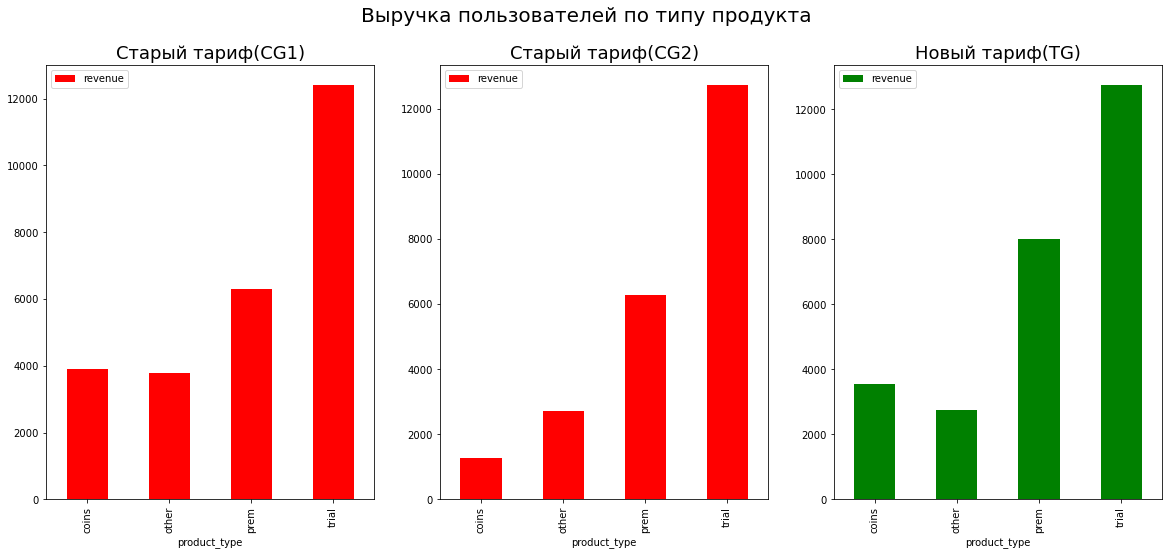

In [21]:
fig, axes = plt.subplots(1,3, figsize=(20,8))

payments_CG1.groupby('product_type').agg({'revenue': 'median'}).plot(kind='bar', ax=axes[0], color='r')
payments_CG2.groupby('product_type').agg({'revenue': 'median'}).plot(kind='bar', ax=axes[1], color='r')
TG_payments.groupby('product_type').agg({'revenue': 'median'}).plot(kind='bar', ax=axes[2], color='g')

fig.suptitle('Выручка пользователей по типу продукта', fontsize=20);
axes[0].set_title('Старый тариф(CG1)', fontsize=18)
axes[1].set_title('Старый тариф(CG2)', fontsize=18)
axes[2].set_title('Новый тариф(TG)', fontsize=18)

plt.show()

* По данным графикам видно, что общая выручка особо не изменилась
* В цифрах выручка приведена ниже, для выборки со старым тарифом и новым выручка составила около <u> 27000 </u>

In [22]:
TG_payments.groupby('product_type').agg({'revenue': 'median'})

,revenue
product_type,
coins,3536.0
other,2756.0
prem,8021.0
trial,12746.5


In [23]:
payments_CG1.groupby('product_type').agg({'revenue': 'median'})

,revenue
product_type,
coins,3913.0
other,3783.0
prem,6292.0
trial,12402.0


In [24]:
TG_payments

,registration_date,payment_date,revenue,payment_service_id,place,country,product_type,registration_day,payment_day
user_id,,,,,,,,,
891345942,2017-11-05 13:00:00,2017-11-13 15:04:00,12909,147,TrialVipPopup,IT,trial,5,13
892054251,2017-10-22 00:33:00,2017-10-30 01:37:00,13923,147,TrialVipPopup,US,trial,22,30
892236423,2017-10-18 01:09:00,2017-10-23 00:15:00,3783,67,Menu,US,other,18,23
892236423,2017-10-18 01:09:00,2017-10-27 22:38:00,3783,67,Menu,US,other,18,27
892168170,2017-10-19 17:10:00,2017-10-27 19:10:00,9087,147,TrialVipPopup,US,trial,19,27
...,...,...,...,...,...,...,...,...,...
891419625,2017-11-04 05:58:00,2017-11-11 08:33:00,14352,147,TrialVipPopup,IL,trial,4,11
891447105,2017-11-03 17:05:00,2017-11-11 04:23:00,7319,147,Fans,GB,prem,3,11
891497073,2017-11-02 15:33:00,2017-11-05 04:06:00,2730,67,EmptyLikes,US,other,2,5


In [25]:
portrait_TG.is_special.value_counts()

0.0    4151
1.0     157
Name: is_special, dtype: int64

In [26]:
TG_payments.shape

(273, 9)

In [27]:
payments_CG1.shape

(377, 7)

In [28]:
(1 - 273/377)

0.27586206896551724

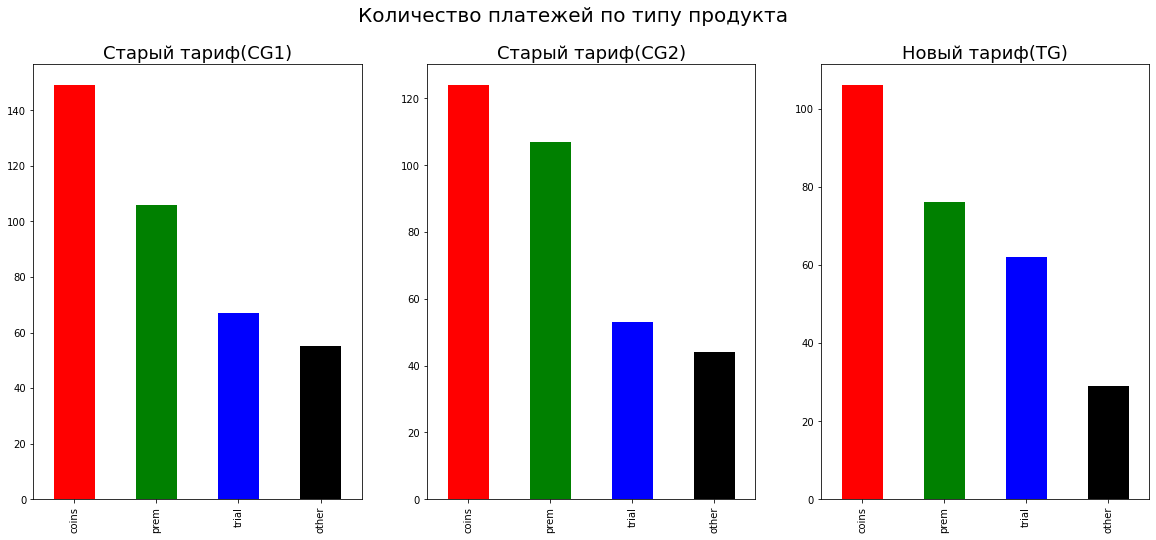

In [90]:
fig, axes = plt.subplots(1,3, figsize=(20,8))

payments_CG1['product_type'].value_counts().plot(kind='bar', ax=axes[0], color=colors)
payments_CG2['product_type'].value_counts().plot(kind='bar', ax=axes[1], color=colors)
TG_payments['product_type'].value_counts().plot(kind='bar', ax=axes[2], color=colors)

fig.suptitle('Количество платежей по типу продукта', fontsize=20);
axes[0].set_title('Старый тариф(CG1)', fontsize=18);
axes[1].set_title('Старый тариф(CG2)', fontsize=18);
axes[2].set_title('Новый тариф(TG)', fontsize=18);


* Учитывая, что в выборке с новым тарифом данных меньше примерно 28% по сравнению со старым тарифом, количество платежей <u> особо не изменилось</u>

In [30]:
payments_CG1['product_type'].value_counts()

coins    149
prem     106
trial     67
other     55
Name: product_type, dtype: int64

In [89]:
payments_CG2['product_type'].value_counts()

coins    124
prem     107
trial     53
other     44
Name: product_type, dtype: int64

In [31]:
TG_payments['product_type'].value_counts()

coins    106
prem      76
trial     62
other     29
Name: product_type, dtype: int64

In [59]:
portrait_CG1.shape

(4340, 12)

In [60]:
portrait_TG.shape

(4308, 12)

## Посмотрим на пользователей по странам и обладают ли они премиум-подпиской

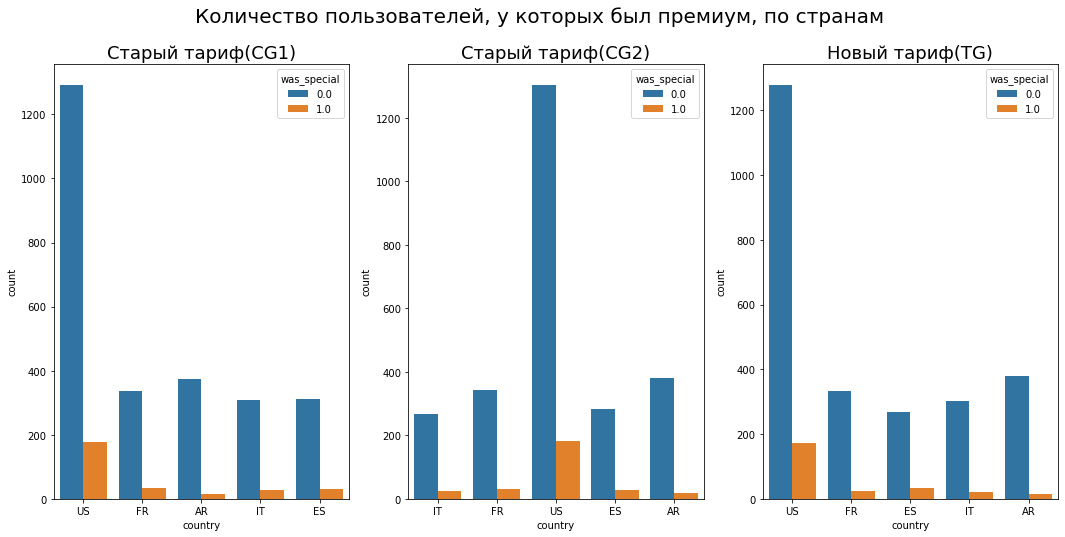

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['country'].\
                          isin(portrait_CG1['country'].value_counts().\
                              head().index)]['country'], hue='was_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['country'].\
                          isin(portrait_CG2['country'].value_counts().\
                              head().index)]['country'], hue='was_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['country'].\
                          isin(portrait_TG['country'].value_counts().\
                              head().index)]['country'], hue='was_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)

fig.suptitle('Количество пользователей, у которых был премиум, по странам', fontsize=20);


### На графиках выше видно соотношение по странам с наибольшим числом пользователей обладали ли они премиумом

In [63]:
display_side_by_side(portrait_CG1[portrait_CG1['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'was_special']).agg({'was_special':'count'}),
                    portrait_TG[portrait_TG['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'was_special']).agg({'was_special':'count'}),
                     portrait_CG1[portrait_CG1['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'is_special']).agg({'is_special':'count'}),
                    portrait_TG[portrait_TG['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'is_special']).agg({'is_special':'count'}),
                    titles=['CG1', 'TG', 'CG1', 'TG'])

> CG1 
 
 
 
 
 was_special 
 
 
 country 
 was_special 
 
 
 
 
 
 AR 
 0.0 
 373 
 
 
 1.0 
 16 
 
 
 ES 
 0.0 
 311 
 
 
 1.0 
 31 
 
 
 FR 
 0.0 
 337 
 
 
 1.0 
 33 
 
 
 IT 
 0.0 
 310 
 
 
 1.0 
 28 
 
 
 US 
 0.0 
 1293 
 
 
 1.0 
 178 
 
 
 > TG 
 
 
 
 
 was_special 
 
 
 country 
 was_special 
 
 
 
 
 
 AR 
 0.0 
 380 
 
 
 1.0 
 16 
 
 
 ES 
 0.0 
 269 
 
 
 1.0 
 32 
 
 
 FR 
 0.0 
 334 
 
 
 1.0 
 25 
 
 
 IT 
 0.0 
 303 
 
 
 1.0 
 20 
 
 
 US 
 0.0 
 1279 
 
 
 1.0 
 171 
 
 
 > CG1 
 
 
 
 
 is_special 
 
 
 country 
 is_special 
 
 
 
 
 
 AR 
 0.0 
 377 
 
 
 1.0 
 12 
 
 
 ES 
 0.0 
 333 
 
 
 1.0 
 9 
 
 
 FR 
 0.0 
 353 
 
 
 1.0 
 17 
 
 
 IT 
 0.0 
 325 
 
 
 1.0 
 13 
 
 
 US 
 0.0 
 1406 
 
 
 1.0 
 65 
 
 
 > TG 
 
 
 
 
 is_special 
 
 
 country 
 is_special 
 
 
 
 
 
 AR 
 0.0 
 389 
 
 
 1.0 
 7 
 
 
 ES 
 0.0 
 287 
 
 
 1.0 
 14 
 
 
 FR 
 0.0 
 343 
 
 
 1.0 
 16 
 
 
 IT 
 0.0 
 315 
 
 
 1.0 
 8 
 
 
 US 
 0.0 
 1398 
 
 
 1.0 
 52

In [71]:
display_side_by_side(portrait_CG2[portrait_CG2['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'was_special']).agg({'was_special':'count'}),
                    portrait_TG[portrait_TG['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'was_special']).agg({'was_special':'count'}),
                     portrait_CG2[portrait_CG2['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'is_special']).agg({'is_special':'count'}),
                    portrait_TG[portrait_TG['country']. \
             isin(['US', 'FR', 'AR', 'IT', 'ES'])].groupby(['country', 'is_special']).agg({'is_special':'count'}),
                    titles=['CG2', 'TG', 'CG2', 'TG'])

> CG2 
 
 
 
 
 was_special 
 
 
 country 
 was_special 
 
 
 
 
 
 AR 
 0.0 
 380 
 
 
 1.0 
 17 
 
 
 ES 
 0.0 
 282 
 
 
 1.0 
 28 
 
 
 FR 
 0.0 
 344 
 
 
 1.0 
 32 
 
 
 IT 
 0.0 
 268 
 
 
 1.0 
 25 
 
 
 US 
 0.0 
 1305 
 
 
 1.0 
 181 
 
 
 > TG 
 
 
 
 
 was_special 
 
 
 country 
 was_special 
 
 
 
 
 
 AR 
 0.0 
 380 
 
 
 1.0 
 16 
 
 
 ES 
 0.0 
 269 
 
 
 1.0 
 32 
 
 
 FR 
 0.0 
 334 
 
 
 1.0 
 25 
 
 
 IT 
 0.0 
 303 
 
 
 1.0 
 20 
 
 
 US 
 0.0 
 1279 
 
 
 1.0 
 171 
 
 
 > CG2 
 
 
 
 
 is_special 
 
 
 country 
 is_special 
 
 
 
 
 
 AR 
 0.0 
 387 
 
 
 1.0 
 10 
 
 
 ES 
 0.0 
 295 
 
 
 1.0 
 15 
 
 
 FR 
 0.0 
 363 
 
 
 1.0 
 13 
 
 
 IT 
 0.0 
 284 
 
 
 1.0 
 9 
 
 
 US 
 0.0 
 1415 
 
 
 1.0 
 71 
 
 
 > TG 
 
 
 
 
 is_special 
 
 
 country 
 is_special 
 
 
 
 
 
 AR 
 0.0 
 389 
 
 
 1.0 
 7 
 
 
 ES 
 0.0 
 287 
 
 
 1.0 
 14 
 
 
 FR 
 0.0 
 343 
 
 
 1.0 
 16 
 
 
 IT 
 0.0 
 315 
 
 
 1.0 
 8 
 
 
 US 
 0.0 
 1398 
 
 
 1.0 
 52

## Заметны небольшие различия в тестовой и контрольной выборках.
* Наиболее заметные различия наблюдаются в <u>США</u>, число пользователей с премиумом там сократилось, а в Испании даже больше пользователей с премиумом в контрольной группе.
* В остальных странах ситуация особо не изменилась

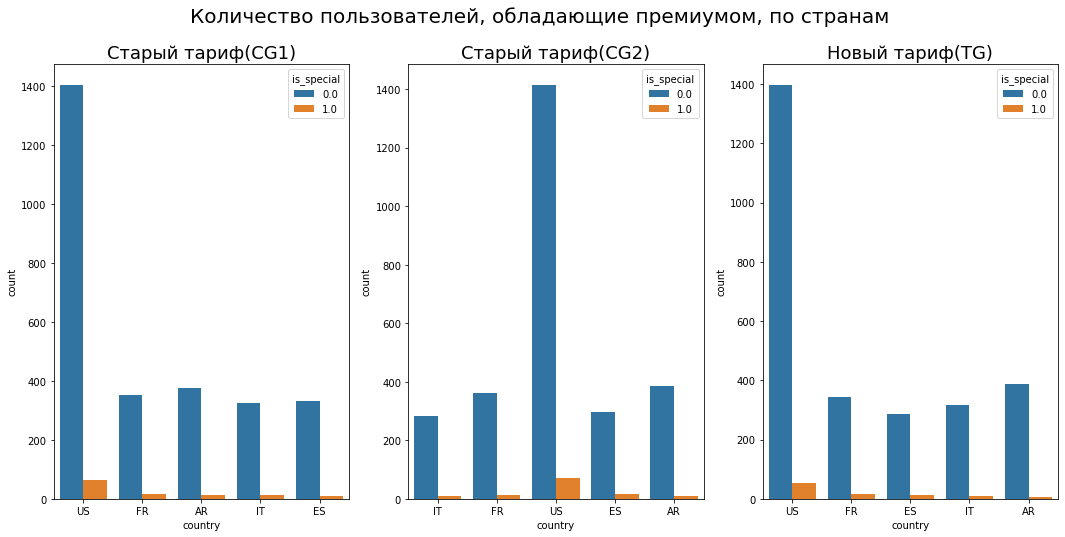

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['country'].\
                          isin(portrait_CG1['country'].value_counts().\
                              head().index)]['country'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['country'].\
                          isin(portrait_CG2['country'].value_counts().\
                              head().index)]['country'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['country'].\
                          isin(portrait_TG['country'].value_counts().\
                              head().index)]['country'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по странам', fontsize=20);
plt.show()

In [106]:
display_side_by_side(TG_payments[TG_payments['place']. \
             isin(['EmptyLikes', 'TrialVipPopup', 'none', 'AutoReplyMessage', 'Menu', 'promo.key31', 'LeftMenu'])]. \
                     groupby(['place', 'product_type']).agg({'place':'count'}),
                    payments_CG1[payments_CG1['place']. \
             isin(['EmptyLikes', 'TrialVipPopup', 'none', 'AutoReplyMessage', 'Menu', 'promo.key31', 'LeftMenu'])]. \
                     groupby(['place', 'product_type']).agg({'place':'count'}),
                     payments_CG2[payments_CG2['place']. \
             isin(['EmptyLikes', 'TrialVipPopup', 'none', 'AutoReplyMessage', 'Menu', 'promo.key31', 'LeftMenu'])]. \
                     groupby(['place', 'product_type']).agg({'place':'count'}),
                    titles=['TG', 'CG1', 'CG2'])

> TG 
 
 
 
 
 place 
 
 
 place 
 product_type 
 
 
 
 
 
 AutoReplyMessage 
 prem 
 21 
 
 
 trial 
 6 
 
 
 EmptyLikes 
 coins 
 60 
 
 
 other 
 12 
 
 
 LeftMenu 
 prem 
 7 
 
 
 Menu 
 coins 
 19 
 
 
 other 
 8 
 
 
 TrialVipPopup 
 trial 
 48 
 
 
 none 
 coins 
 16 
 
 
 other 
 2 
 
 
 prem 
 14 
 
 
 trial 
 2 
 
 
 promo.key31 
 prem 
 15 
 
 
 trial 
 3 
 
 
 > CG1 
 
 
 
 
 place 
 
 
 place 
 product_type 
 
 
 
 
 
 AutoReplyMessage 
 prem 
 24 
 
 
 trial 
 5 
 
 
 EmptyLikes 
 coins 
 80 
 
 
 other 
 19 
 
 
 LeftMenu 
 prem 
 15 
 
 
 Menu 
 coins 
 22 
 
 
 other 
 9 
 
 
 TrialVipPopup 
 trial 
 56 
 
 
 none 
 coins 
 12 
 
 
 prem 
 21 
 
 
 trial 
 1 
 
 
 promo.key31 
 prem 
 21 
 
 
 > CG2 
 
 
 
 
 place 
 
 
 place 
 product_type 
 
 
 
 
 
 AutoReplyMessage 
 prem 
 22 
 
 
 trial 
 2 
 
 
 EmptyLikes 
 coins 
 72 
 
 
 other 
 29 
 
 
 LeftMenu 
 prem 
 23 
 
 
 trial 
 2 
 
 
 Menu 
 coins 
 10 
 
 
 other 
 4 
 
 
 TrialVipPopup 
 trial 
 45 
 
 
 none 
 coins 
 11 
 
 
 other 
 3 
 
 
 prem 
 18 
 
 
 promo.key31 
 prem 
 22

## В тестовой группе премиум реже начали покупать через LeftMenu, 

In [39]:
portrait_CG1.head()

,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
user_id,,,,,,,,,,,,
892319115,25,435,0.0,US,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0
891248523,29,500,0.0,US,"1,2",1,26,32,12,0.0,0.0,0
891670932,33,800,0.0,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0
891060786,26,0,0.0,AR,"1,2,3,4,5",1,23,29,0,0.0,0.0,0
892006554,35,294,0.0,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0


## Рассмотрим количество пользователей с премиумом по возрасту, поделив их на группы, например, от 16 до 20 лет, от 21 до 27 и т.д.

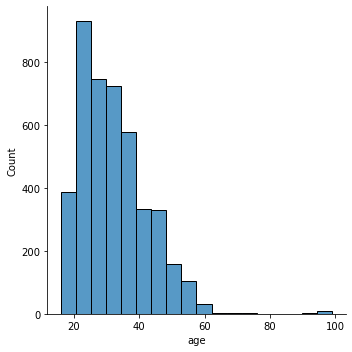

In [144]:
sns.displot(portrait_CG1['age'], bins=18)

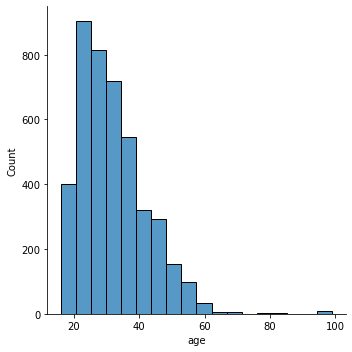

In [146]:
sns.displot(portrait_TG['age'], bins=18)

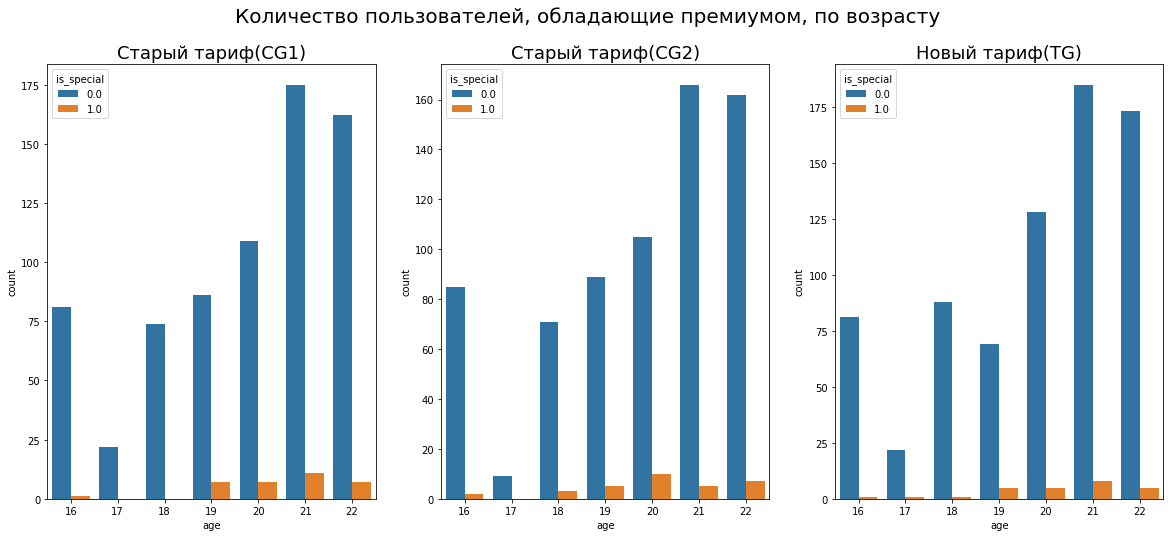

In [138]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))

sns.countplot(x=portrait_CG1[portrait_CG1['age'].\
                          isin(range(16,23))]['age'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['age'].\
                          isin(range(16,23))]['age'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['age'].\
                          isin(range(16,23))]['age'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по возрасту', fontsize=20);

plt.show()

In [132]:
display_side_by_side(portrait_CG1[portrait_CG1['age'].isin(range(16, 23))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    portrait_TG[portrait_TG['age'].isin(range(16, 23))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    titles=['CG1', 'TG'])

> CG1 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 16 
 0.0 
 81 
 
 
 1.0 
 1 
 
 
 17 
 0.0 
 22 
 
 
 18 
 0.0 
 74 
 
 
 19 
 0.0 
 86 
 
 
 1.0 
 7 
 
 
 20 
 0.0 
 109 
 
 
 1.0 
 7 
 
 
 21 
 0.0 
 175 
 
 
 1.0 
 11 
 
 
 22 
 0.0 
 162 
 
 
 1.0 
 7 
 
 
 > TG 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 16 
 0.0 
 81 
 
 
 1.0 
 1 
 
 
 17 
 0.0 
 22 
 
 
 1.0 
 1 
 
 
 18 
 0.0 
 88 
 
 
 1.0 
 1 
 
 
 19 
 0.0 
 69 
 
 
 1.0 
 5 
 
 
 20 
 0.0 
 128 
 
 
 1.0 
 5 
 
 
 21 
 0.0 
 185 
 
 
 1.0 
 8 
 
 
 22 
 0.0 
 173 
 
 
 1.0 
 5

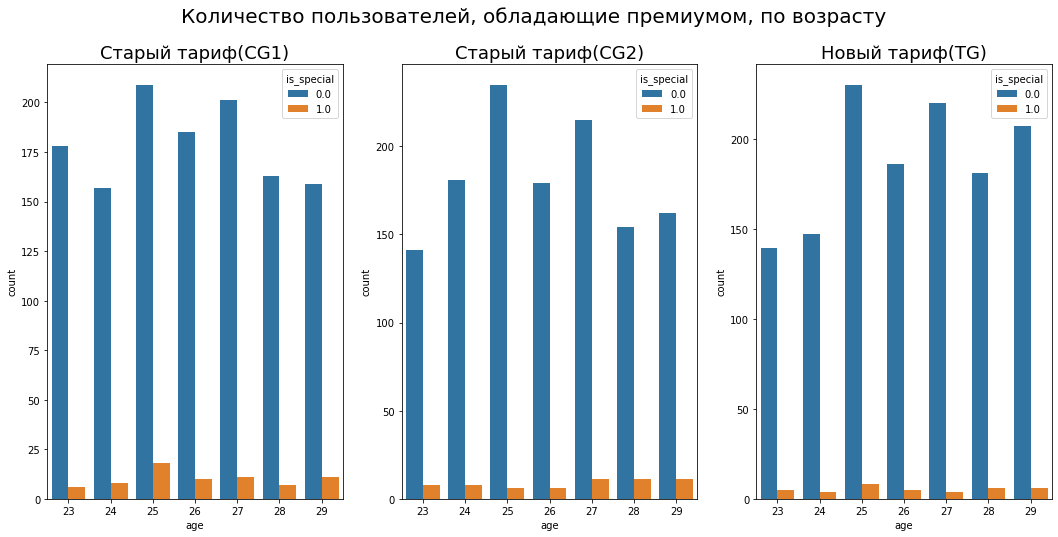

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['age'].\
                          isin(range(23,30))]['age'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['age'].\
                          isin(range(23,30))]['age'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['age'].\
                          isin(range(23,30))]['age'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по возрасту', fontsize=20);

plt.show()

In [134]:
display_side_by_side(portrait_CG1[portrait_CG1['age'].isin(range(23, 30))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    portrait_TG[portrait_TG['age'].isin(range(23, 30))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    titles=['CG1', 'TG'])

> CG1 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 23 
 0.0 
 178 
 
 
 1.0 
 6 
 
 
 24 
 0.0 
 157 
 
 
 1.0 
 8 
 
 
 25 
 0.0 
 209 
 
 
 1.0 
 18 
 
 
 26 
 0.0 
 185 
 
 
 1.0 
 10 
 
 
 27 
 0.0 
 201 
 
 
 1.0 
 11 
 
 
 28 
 0.0 
 163 
 
 
 1.0 
 7 
 
 
 29 
 0.0 
 159 
 
 
 1.0 
 11 
 
 
 > TG 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 23 
 0.0 
 139 
 
 
 1.0 
 5 
 
 
 24 
 0.0 
 147 
 
 
 1.0 
 4 
 
 
 25 
 0.0 
 230 
 
 
 1.0 
 8 
 
 
 26 
 0.0 
 186 
 
 
 1.0 
 5 
 
 
 27 
 0.0 
 220 
 
 
 1.0 
 4 
 
 
 28 
 0.0 
 181 
 
 
 1.0 
 6 
 
 
 29 
 0.0 
 207 
 
 
 1.0 
 6

* Видно, что пользователи в тестовой выборке с <u>24 до 28</u> лет заметно меньше обладают премиумом

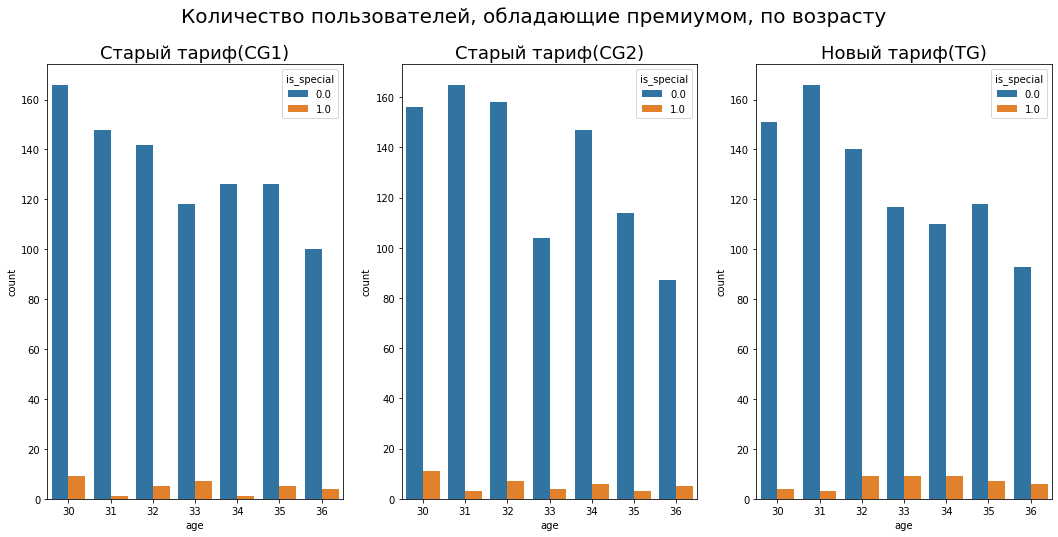

In [139]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['age'].\
                          isin(range(30,37))]['age'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['age'].\
                          isin(range(30,37))]['age'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['age'].\
                          isin(range(30,37))]['age'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по возрасту', fontsize=20);

plt.show()

In [140]:
display_side_by_side(portrait_CG1[portrait_CG1['age'].isin(range(30, 37))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    portrait_TG[portrait_TG['age'].isin(range(30, 37))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    titles=['CG1', 'TG'])

> CG1 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 30 
 0.0 
 166 
 
 
 1.0 
 9 
 
 
 31 
 0.0 
 148 
 
 
 1.0 
 1 
 
 
 32 
 0.0 
 142 
 
 
 1.0 
 5 
 
 
 33 
 0.0 
 118 
 
 
 1.0 
 7 
 
 
 34 
 0.0 
 126 
 
 
 1.0 
 1 
 
 
 35 
 0.0 
 126 
 
 
 1.0 
 5 
 
 
 36 
 0.0 
 100 
 
 
 1.0 
 4 
 
 
 > TG 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 30 
 0.0 
 151 
 
 
 1.0 
 4 
 
 
 31 
 0.0 
 166 
 
 
 1.0 
 3 
 
 
 32 
 0.0 
 140 
 
 
 1.0 
 9 
 
 
 33 
 0.0 
 117 
 
 
 1.0 
 9 
 
 
 34 
 0.0 
 110 
 
 
 1.0 
 9 
 
 
 35 
 0.0 
 118 
 
 
 1.0 
 7 
 
 
 36 
 0.0 
 93 
 
 
 1.0 
 6

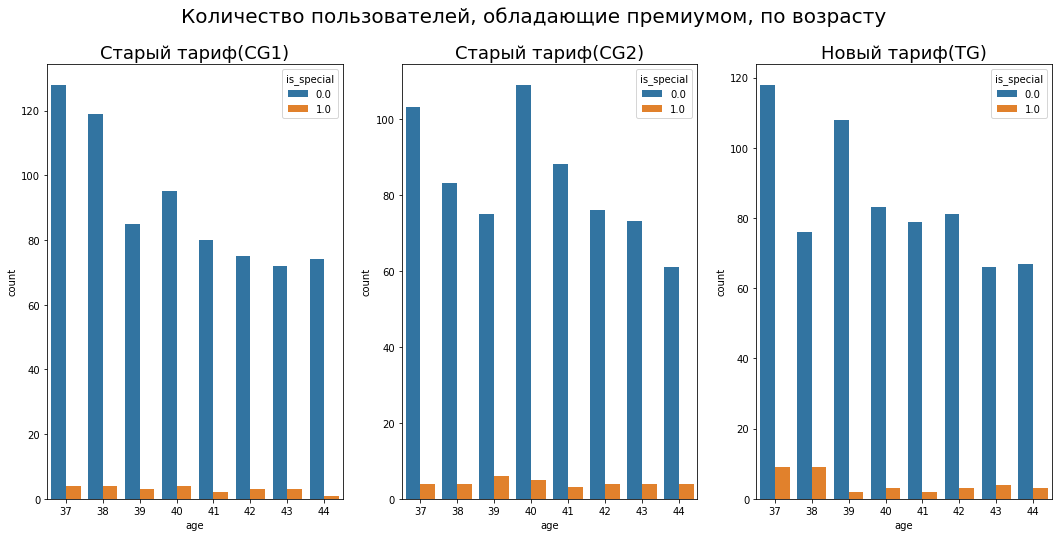

In [147]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['age'].\
                          isin(range(37,45))]['age'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['age'].\
                          isin(range(37,45))]['age'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['age'].\
                          isin(range(37,45))]['age'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по возрасту', fontsize=20);

plt.show()

In [148]:
display_side_by_side(portrait_CG1[portrait_CG1['age'].isin(range(37, 45))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    portrait_TG[portrait_TG['age'].isin(range(37, 45))].groupby(['age', 'is_special']).agg({'age': 'count'}),
                    titles=['CG1', 'TG'])

> CG1 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 37 
 0.0 
 128 
 
 
 1.0 
 4 
 
 
 38 
 0.0 
 119 
 
 
 1.0 
 4 
 
 
 39 
 0.0 
 85 
 
 
 1.0 
 3 
 
 
 40 
 0.0 
 95 
 
 
 1.0 
 4 
 
 
 41 
 0.0 
 80 
 
 
 1.0 
 2 
 
 
 42 
 0.0 
 75 
 
 
 1.0 
 3 
 
 
 43 
 0.0 
 72 
 
 
 1.0 
 3 
 
 
 44 
 0.0 
 74 
 
 
 1.0 
 1 
 
 
 > TG 
 
 
 
 
 age 
 
 
 age 
 is_special 
 
 
 
 
 
 37 
 0.0 
 118 
 
 
 1.0 
 9 
 
 
 38 
 0.0 
 76 
 
 
 1.0 
 9 
 
 
 39 
 0.0 
 108 
 
 
 1.0 
 2 
 
 
 40 
 0.0 
 83 
 
 
 1.0 
 3 
 
 
 41 
 0.0 
 79 
 
 
 1.0 
 2 
 
 
 42 
 0.0 
 81 
 
 
 1.0 
 3 
 
 
 43 
 0.0 
 66 
 
 
 1.0 
 4 
 
 
 44 
 0.0 
 67 
 
 
 1.0 
 3

## Вывод пользователи возрастом от 31 до 38 лет покупают немного чаще премиум, остальные покупают либо с также, либо реже

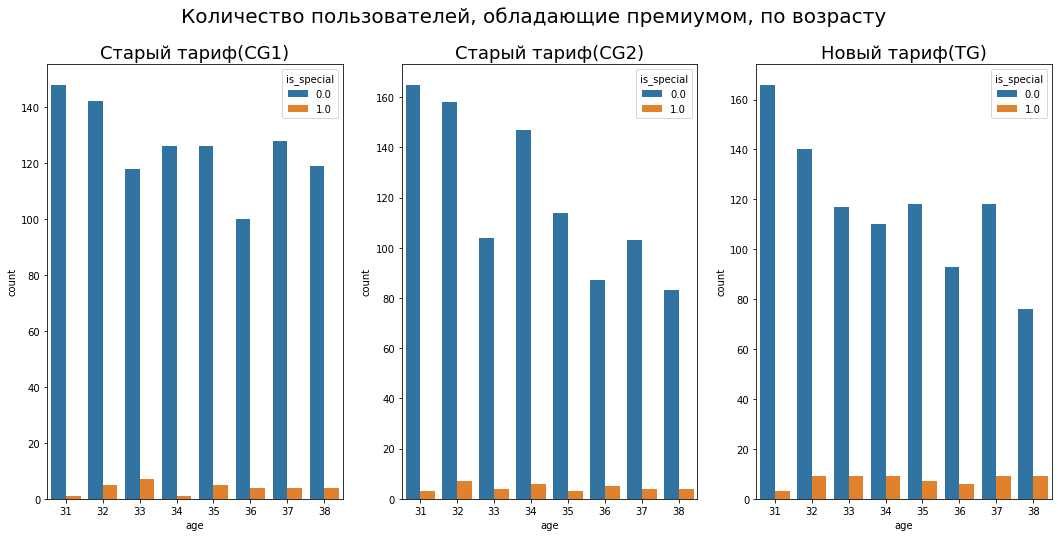

In [173]:
fig, ax = plt.subplots(1, 3, figsize=(18,8))

sns.countplot(x=portrait_CG1[portrait_CG1['age'].\
                          isin(range(31,39))]['age'], hue='is_special',
             data=portrait_CG1, ax=ax[0]).set_title('Старый тариф(CG1)', fontsize=18)

sns.countplot(x=portrait_CG2[portrait_CG2['age'].\
                          isin(range(31,39))]['age'], hue='is_special',
             data=portrait_CG2, ax=ax[1]).set_title('Старый тариф(CG2)', fontsize=18)

sns.countplot(x=portrait_TG[portrait_TG['age'].\
                          isin(range(31,39))]['age'], hue='is_special',
             data=portrait_TG, ax=ax[2]).set_title('Новый тариф(TG)', fontsize=18)
fig.suptitle('Количество пользователей, обладающие премиумом, по возрасту', fontsize=20);

plt.show()

## Также можно посмотреть, возможно эксперимент удачен на тех пользователях, которые часто заходили в приложение после регистрации

In [159]:
portrait_CG1.head()

,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue,retention_days_len
user_id,,,,,,,,,,,,,
892319115,25,435,0.0,US,"1,2,3,4,5,6",0,22,32,982,0.0,0.0,0,6
891248523,29,500,0.0,US,"1,2",1,26,32,12,0.0,0.0,0,2
891670932,33,800,0.0,FR,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,0.0,0.0,0,10
891060786,26,0,0.0,AR,"1,2,3,4,5",1,23,29,0,0.0,0.0,0,5
892006554,35,294,0.0,US,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,0.0,0.0,0,14


In [160]:
portrait_CG1['retention_days_len'] = portrait_CG1['retention_days'].apply(lambda t: str(t).count(',') + 1)
portrait_CG2['retention_days_len'] = portrait_CG2['retention_days'].apply(lambda t: str(t).count(',') + 1)
portrait_TG['retention_days_len'] = portrait_TG['retention_days'].apply(lambda t: str(t).count(',') + 1)

In [161]:
portrait_CG1['retention_days_len'].unique()

array([ 6,  2, 10,  5, 14, 21, 11,  3,  1,  9, 18, 31, 16, 25,  7,  4, 13,
       15, 26, 20, 23, 19, 27, 12,  8, 22, 24, 17, 28, 29, 30],
      dtype=int64)

In [168]:
display_side_by_side(portrait_CG1[portrait_CG1['retention_days_len'].isin(range(1,10))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                     portrait_CG2[portrait_CG2['retention_days_len'].isin(range(1,10))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    portrait_TG[portrait_TG['retention_days_len'].isin(range(1,10))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    titles=['CG1', 'CG2', 'TG'])

> CG1 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 1 
 0.0 
 1996 
 
 
 1.0 
 38 
 
 
 2 
 0.0 
 365 
 
 
 1.0 
 13 
 
 
 3 
 0.0 
 255 
 
 
 1.0 
 12 
 
 
 4 
 0.0 
 202 
 
 
 1.0 
 15 
 
 
 5 
 0.0 
 161 
 
 
 1.0 
 9 
 
 
 6 
 0.0 
 160 
 
 
 1.0 
 5 
 
 
 7 
 0.0 
 138 
 
 
 1.0 
 13 
 
 
 8 
 0.0 
 97 
 
 
 1.0 
 9 
 
 
 9 
 0.0 
 96 
 
 
 1.0 
 16 
 
 
 > CG2 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 1 
 0.0 
 2031 
 
 
 1.0 
 46 
 
 
 2 
 0.0 
 358 
 
 
 1.0 
 15 
 
 
 3 
 0.0 
 226 
 
 
 1.0 
 10 
 
 
 4 
 0.0 
 186 
 
 
 1.0 
 11 
 
 
 5 
 0.0 
 182 
 
 
 1.0 
 8 
 
 
 6 
 0.0 
 128 
 
 
 1.0 
 13 
 
 
 7 
 0.0 
 131 
 
 
 1.0 
 7 
 
 
 8 
 0.0 
 106 
 
 
 1.0 
 7 
 
 
 9 
 0.0 
 90 
 
 
 1.0 
 8 
 
 
 > TG 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 1 
 0.0 
 1960 
 
 
 1.0 
 31 
 
 
 2 
 0.0 
 360 
 
 
 1.0 
 17 
 
 
 3 
 0.0 
 243 
 
 
 1.0 
 9 
 
 
 4 
 0.0 
 225 
 
 
 1.0 
 7 
 
 
 5 
 0.0 
 188 
 
 
 1.0 
 10 
 
 
 6 
 0.0 
 172 
 
 
 1.0 
 4 
 
 
 7 
 0.0 
 128 
 
 
 1.0 
 8 
 
 
 8 
 0.0 
 115 
 
 
 1.0 
 8 
 
 
 9 
 0.0 
 103 
 
 
 1.0 
 10

In [169]:
display_side_by_side(portrait_CG1[portrait_CG1['retention_days_len'].isin(range(10,20))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                     portrait_CG2[portrait_CG2['retention_days_len'].isin(range(10,20))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    portrait_TG[portrait_TG['retention_days_len'].isin(range(10,20))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    titles=['CG1', 'CG2', 'TG'])

> CG1 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 10 
 0.0 
 76 
 
 
 1.0 
 9 
 
 
 11 
 0.0 
 77 
 
 
 1.0 
 2 
 
 
 12 
 0.0 
 41 
 
 
 1.0 
 4 
 
 
 13 
 0.0 
 58 
 
 
 1.0 
 1 
 
 
 14 
 0.0 
 46 
 
 
 1.0 
 4 
 
 
 15 
 0.0 
 47 
 
 
 1.0 
 4 
 
 
 16 
 0.0 
 52 
 
 
 1.0 
 3 
 
 
 17 
 0.0 
 36 
 
 
 1.0 
 3 
 
 
 18 
 0.0 
 37 
 
 
 1.0 
 6 
 
 
 19 
 0.0 
 35 
 
 
 1.0 
 3 
 
 
 > CG2 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 10 
 0.0 
 80 
 
 
 1.0 
 4 
 
 
 11 
 0.0 
 58 
 
 
 1.0 
 2 
 
 
 12 
 0.0 
 67 
 
 
 1.0 
 5 
 
 
 13 
 0.0 
 59 
 
 
 1.0 
 4 
 
 
 14 
 0.0 
 44 
 
 
 1.0 
 3 
 
 
 15 
 0.0 
 42 
 
 
 1.0 
 2 
 
 
 16 
 0.0 
 42 
 
 
 1.0 
 6 
 
 
 17 
 0.0 
 30 
 
 
 1.0 
 7 
 
 
 18 
 0.0 
 34 
 
 
 1.0 
 4 
 
 
 19 
 0.0 
 19 
 
 
 1.0 
 7 
 
 
 > TG 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 10 
 0.0 
 88 
 
 
 1.0 
 5 
 
 
 11 
 0.0 
 57 
 
 
 1.0 
 3 
 
 
 12 
 0.0 
 61 
 
 
 1.0 
 3 
 
 
 13 
 0.0 
 54 
 
 
 1.0 
 6 
 
 
 14 
 0.0 
 44 
 
 
 1.0 
 4 
 
 
 15 
 0.0 
 49 
 
 
 1.0 
 2 
 
 
 16 
 0.0 
 35 
 
 
 1.0 
 1 
 
 
 17 
 0.0 
 42 
 
 
 1.0 
 3 
 
 
 18 
 0.0 
 27 
 
 
 1.0 
 2 
 
 
 19 
 0.0 
 24 
 
 
 1.0 
 4

In [171]:
display_side_by_side(portrait_CG1[portrait_CG1['retention_days_len'].isin(range(20,31))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                     portrait_CG2[portrait_CG2['retention_days_len'].isin(range(20,31))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    portrait_TG[portrait_TG['retention_days_len'].isin(range(20,31))].groupby(['retention_days_len', 'is_special']).agg({'retention_days_len': 'count'}),
                    titles=['CG1', 'CG2', 'TG'])

> CG1 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 20 
 0.0 
 21 
 
 
 1.0 
 1 
 
 
 21 
 0.0 
 27 
 
 
 1.0 
 3 
 
 
 22 
 0.0 
 25 
 
 
 1.0 
 1 
 
 
 23 
 0.0 
 13 
 
 
 24 
 0.0 
 22 
 
 
 1.0 
 4 
 
 
 25 
 0.0 
 18 
 
 
 1.0 
 3 
 
 
 26 
 0.0 
 9 
 
 
 1.0 
 3 
 
 
 27 
 0.0 
 9 
 
 
 1.0 
 4 
 
 
 28 
 0.0 
 6 
 
 
 1.0 
 1 
 
 
 29 
 0.0 
 10 
 
 
 30 
 0.0 
 5 
 
 
 > CG2 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 20 
 0.0 
 23 
 
 
 1.0 
 3 
 
 
 21 
 0.0 
 14 
 
 
 1.0 
 2 
 
 
 22 
 0.0 
 18 
 
 
 1.0 
 2 
 
 
 23 
 0.0 
 29 
 
 
 1.0 
 3 
 
 
 24 
 0.0 
 13 
 
 
 1.0 
 4 
 
 
 25 
 0.0 
 15 
 
 
 1.0 
 3 
 
 
 26 
 0.0 
 9 
 
 
 1.0 
 2 
 
 
 27 
 0.0 
 8 
 
 
 1.0 
 1 
 
 
 28 
 0.0 
 12 
 
 
 1.0 
 2 
 
 
 29 
 0.0 
 6 
 
 
 30 
 0.0 
 9 
 
 
 > TG 
 
 
 
 
 retention_days_len 
 
 
 retention_days_len 
 is_special 
 
 
 
 
 
 20 
 0.0 
 20 
 
 
 1.0 
 2 
 
 
 21 
 0.0 
 25 
 
 
 1.0 
 3 
 
 
 22 
 0.0 
 29 
 
 
 1.0 
 1 
 
 
 23 
 0.0 
 17 
 
 
 1.0 
 1 
 
 
 24 
 0.0 
 17 
 
 
 1.0 
 4 
 
 
 25 
 0.0 
 20 
 
 
 1.0 
 4 
 
 
 26 
 0.0 
 12 
 
 
 1.0 
 1 
 
 
 27 
 0.0 
 8 
 
 
 1.0 
 2 
 
 
 28 
 0.0 
 9 
 
 
 1.0 
 1 
 
 
 29 
 0.0 
 11 
 
 
 1.0 
 1 
 
 
 30 
 0.0 
 4

## К сожалению, явных выводов из количества дней проведенных после регистрации сделать нельзя. Количество пользователей с премиумом примерно одинаковое как в тестовой, так и в контрольных выборках

C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\supervised.py:546: FutureWarning: The second positional argument of plot is a Series 'y'. If passing a column name, use a keyword.
  warnings.warn("The second positional argument of plot is a Series 'y'."


Target looks like classification
Linear Discriminant Analysis training set score: 0.502


C:\ProgramData\Anaconda3\lib\site-packages\dabl\plot\utils.py:374: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


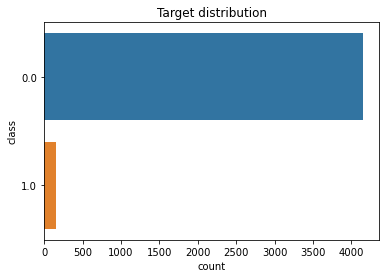

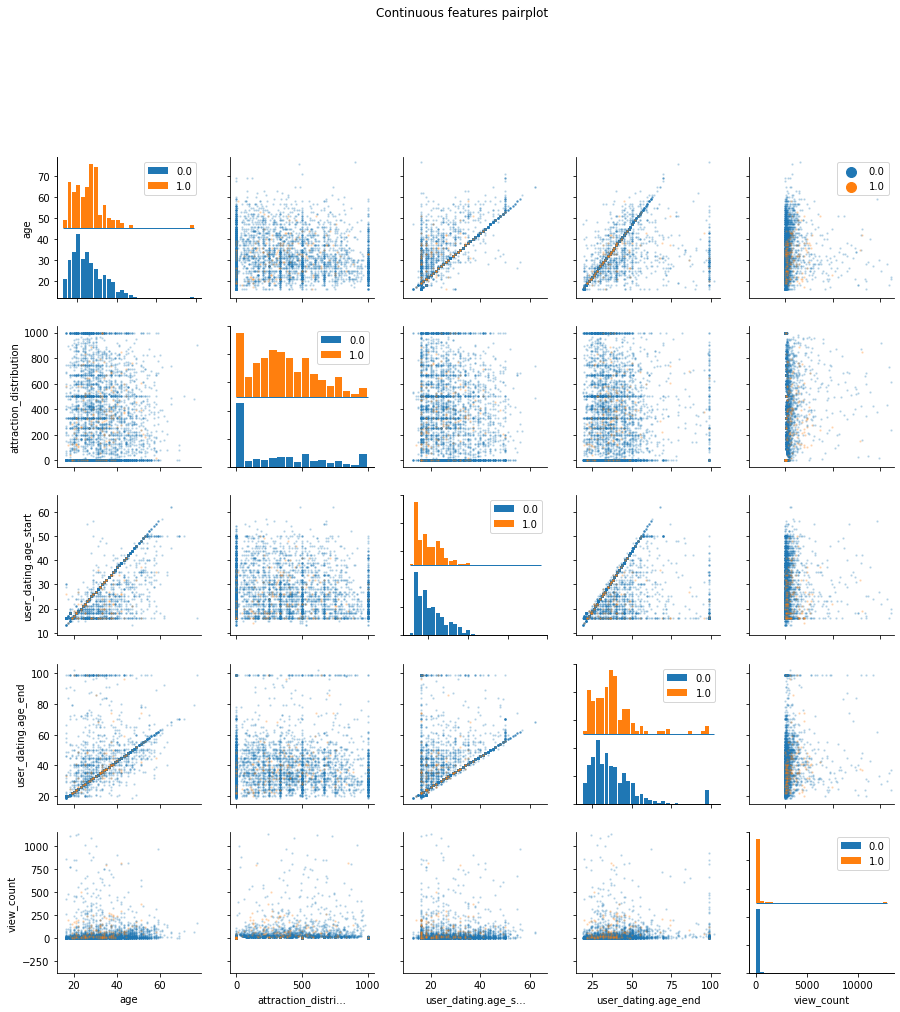

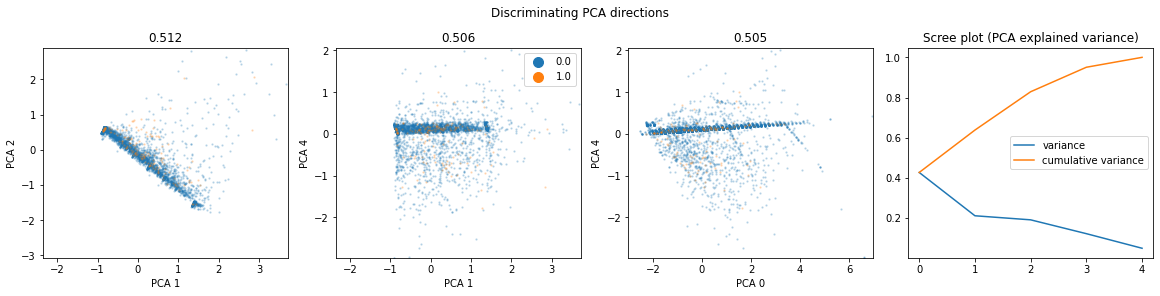

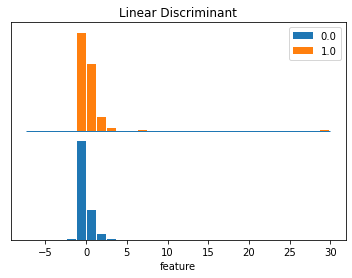

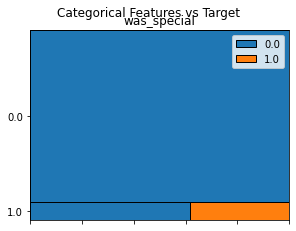

In [40]:
dabl.plot(portrait_TG, 'is_special');

In [43]:
portrait_CG1.describe()

,age,attraction_distribution,coins,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,32.095392,312.048848,24.136866,0.958065,26.793779,38.553226,44.467512,0.100461,0.044240,594.761982
std,10.257466,320.972130,1518.279250,0.200465,9.405103,15.226951,204.800272,0.300648,0.205651,7987.922925
min,16.000000,0.000000,0.000000,0.000000,13.000000,19.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,1.000000,19.000000,28.000000,1.000000,0.000000,0.000000,0.000000
50%,30.000000,238.500000,0.000000,1.000000,25.000000,35.000000,6.000000,0.000000,0.000000,0.000000
75%,38.000000,518.000000,0.000000,1.000000,32.000000,45.000000,21.000000,0.000000,0.000000,0.000000
max,99.000000,1000.000000,99958.000000,1.000000,96.000000,102.000000,4953.000000,1.000000,1.000000,486330.000000


In [44]:
portrait_TG.head()

,age,attraction_distribution,coins,country,retention_days,sex,user_dating.age_start,user_dating.age_end,view_count,was_special,is_special,total_revenue
user_id,,,,,,,,,,,,
892309896,27,685,0.0,US,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,0.0,0.0,0
892044516,27,0,0.0,DE,0,1,24,30,0,0.0,0.0,0
892185708,45,44,0.0,IL,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,0.0,0.0,0
892130292,32,0,0.0,US,"1,2,3,4,5,6,7,8,9,10,11,12",1,29,35,0,0.0,0.0,0
891406035,27,1000,0.0,FR,0,1,24,30,1,1.0,0.0,0


<AxesSubplot:xlabel='sex'>

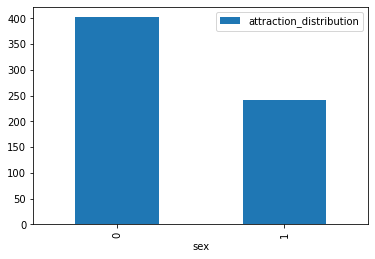

In [176]:
portrait_TG.groupby('sex').agg({'attraction_distribution': 'median'}).plot(kind='bar')

# Итог
## Удвоение стоимости премиум подписки целесообразно для пользователей в возрасте от 31 до 38 лет.